In [1]:
import pathlib
import json
import numpy as np
import pandas as pd


In [2]:
base_dir = pathlib.Path("/bime-munin/xiruod/tmp/")

In [3]:
auprc_eval_ls = []
C_y_ls = []
alpha_train_ls = []
alpha_test_ls = []


for i in base_dir.glob("quantization_epoch3-llama-output-*/all_results.json"):
    try:
        with open(i) as json_file:
            data = json.load(json_file)
        
        auprc_eval_ls.append(data["eval_auprc"])
        C_y_ls.append(data["mix_param_dict"]["C_y"])
        alpha_train_ls.append(data["mix_param_dict"]["alpha_train"])
        alpha_test_ls.append(data["mix_param_dict"]["alpha_test"])
        
    except:
        print("No all_results.json in " + str(i))

In [4]:
data

{'epoch': 3.0,
 'eval_auprc': 0.9007223942327178,
 'eval_loss': 0.5641628503799438,
 'eval_runtime': 153.9282,
 'eval_samples_per_second': 6.497,
 'eval_steps_per_second': 0.812,
 'mix_param_dict': {'C_y': 0.48,
  'C_z': 0.4,
  'alpha_test': 0.6209213230591549,
  'alpha_train': 1.4999999999999998,
  'p_mix_z0': 0.6,
  'p_mix_z1': 0.4,
  'p_pos_test': 0.48,
  'p_pos_test_z0': 0.5657918504346757,
  'p_pos_test_z1': 0.35131222434798637,
  'p_pos_train': 0.48,
  'p_pos_train_z0': 0.4,
  'p_pos_train_z1': 0.6},
 'n_test': 1000,
 'n_train': 4000,
 'n_z0_neg_test': 261,
 'n_z0_neg_train': 1440,
 'n_z0_pos_test': 339,
 'n_z0_pos_train': 960,
 'n_z1_neg_test': 259,
 'n_z1_neg_train': 640,
 'n_z1_pos_test': 141,
 'n_z1_pos_train': 960,
 'train_loss': 0.4223956326643626,
 'train_runtime': 13074.0328,
 'train_samples_per_second': 0.918,
 'train_steps_per_second': 0.057}

In [5]:
df = pd.DataFrame({"auprc":auprc_eval_ls, "C_y":C_y_ls, "alpha_train":alpha_train_ls, "alpha_test":alpha_test_ls})

In [6]:
df

,auprc,C_y,alpha_train,alpha_test
0,0.937326,0.48,0.666667,0.289664
1,0.898644,0.48,1.500000,0.179859
2,0.901935,0.48,1.500000,0.564474
3,0.950504,0.48,0.666667,0.179859
4,0.945695,0.48,0.666667,0.350494
5,0.905005,0.48,1.500000,0.513158
6,0.924887,0.48,0.666667,0.564474
7,0.900743,0.48,1.500000,0.289664
8,0.934668,0.48,0.666667,0.620921
9,0.899907,0.48,1.500000,0.350494


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/NETID/xiruod/anaconda3/envs/llama2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/NETID/xiruod/anaconda3/envs/llama2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/NETID/xiruod/anaconda3/envs/llama2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/NETID/xiruod/anaconda3/envs/llama2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

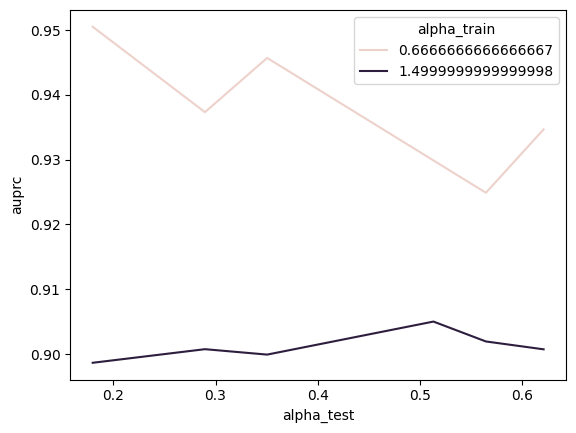

In [55]:
g = sns.lineplot(data=df, x="alpha_test", y="auprc", hue="alpha_train")
# g.set_xscale("log")

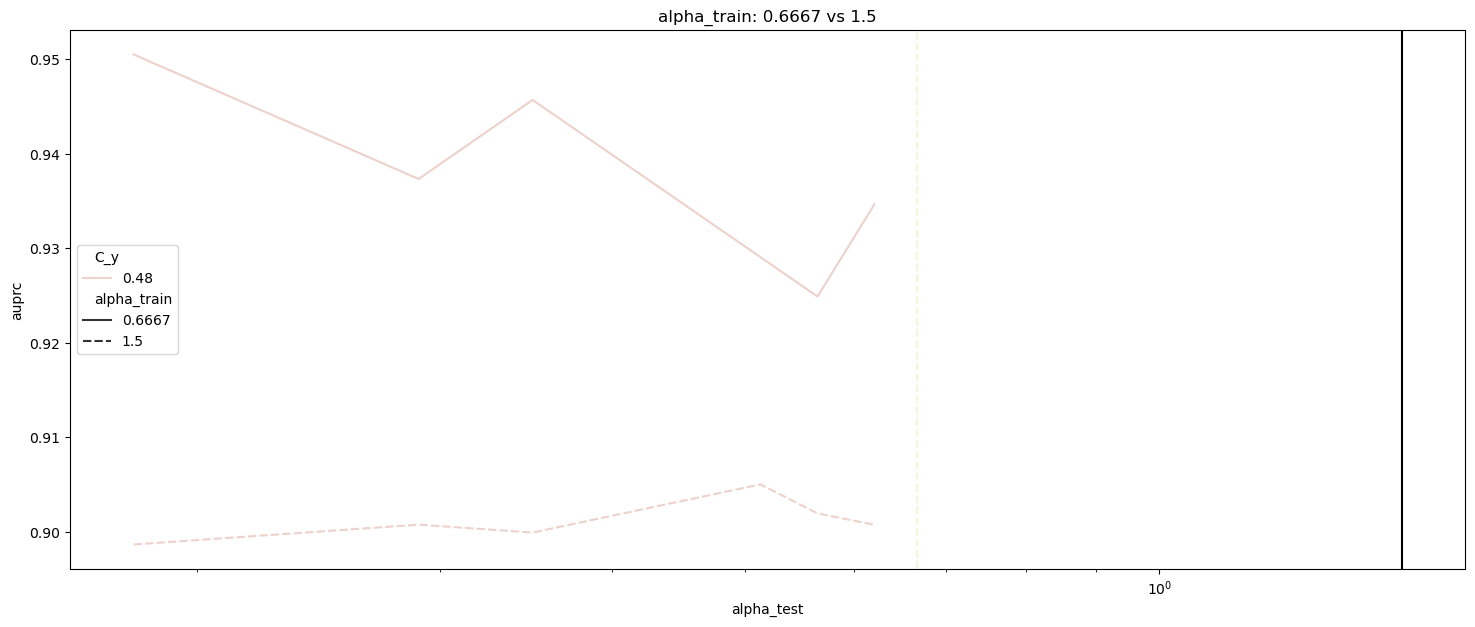

In [38]:
_df = df.copy()

_df['alpha_train'] = _df['alpha_train'].round(4)

_df = _df.query("alpha_train.isin([1.5, 0.6667])")
alpha_train = 1.5

reciprocal = round(1 / alpha_train, 4)
fig, ax = plt.subplots(1,1, figsize=(8,7))

_df_plt = _df[(_df['alpha_train'] == alpha_train) | (_df['alpha_train'] == reciprocal) ]
_df_plt = _df_plt.query("C_y == 0.48")

sns.lineplot(data=_df_plt, x='alpha_test',y='auprc', style='alpha_train', hue='C_y', ax=ax)


ax.set_xscale("log")
ax.axvline(alpha_train, color="black", linestyle='solid')
ax.axvline(reciprocal, color="beige", linestyle='dashed')
ax.title.set_text("alpha_train: " + str(reciprocal) + " vs " + str(alpha_train))
